This example is adapted from [my SciPy 2015 talk](https://www.youtube.com/watch?v=hgBx_DBiPxA), and was updated for a BIO 290 presentation on Emperor at Northern Arizona University by TJ Owen (Spring, 2015). 

In [53]:
import warnings
from StringIO import StringIO
import numpy as np
import pandas as pd

from skbio.alignment import global_pairwise_align
from skbio import DistanceMatrix
from IPython.display import FileLink

warnings.simplefilter('ignore')

data = StringIO('SampleID,Spelling,Pronunciation,GeogrpahicLocation,Type\n0,Afrikaans,"\'n Bier, asseblief",A beer ah-suh-bleef,,\n1,Basque,"Garagardo bat, mesedez",Gara-gardo bat mese-des,European,Other\n2,Breton,"Ur banne bier am bo, mar plij",Oor bah-ne beer am boh mar pleezh,European,West Germanic\n3,Catalan,"Una cervesa, si us plau",Oona servayzeh see oos plow,European,Latin\n4,Croatian,"Jedno pivo, molim","Yed-no pee-vo, mo-lim",,\n5,Czech / Slovak,"Pivo, pros\xc3\xadm","Pee-vo, pro-seem",,\n6,Danish,Jeg vil gerne have en \xc3\xb8l,Yay vil geh-neh heh en url,European,North Germanic\n7,Dutch,"Een bier, alsjeblieft","Un beer, ahls-yer-bleeft",European,West Germanic\n8,English,"One beer, please","Wun beer, pleez",European,West Germanic\n9,Esperanto,"Unu bieron, mi petas","Oo-noo bee-airon, mee peh-tahs",European,Latin\n10,Estonian,"\xc3\x9cks \xc3\xb5lu, palun","Ooks ur-loo, pah-lun",European,Uralic\n11,Finnish,"Olut mulle, kiitos",O-loot moolek kee-tos,European,Uralic\n12,French,"Une bi\xc3\xa8re, s\'il vous pla\xc3\xaet","Oon bee-air, seel voo pleh",European,Latin\n13,German,"Ein Bier, bitte","Ine beer, bitt-uh",European,West Germanic\n14,Hungarian,Egy poh\xc3\xa1r s\xc3\xb6rt k\xc3\xa9rek,Edj pohar shurt kayrek,European,Uralic\n15,Icelandic,"Einn bj\xc3\xb3r, takk",Ay-dn byohr tahk,European,North Germanic\n16,Irish,"Beoir amh\xc3\xa1in, le do thoil","Byohr awoyn, lyeh doh hull",European,West Germanic\n17,Italian,"Una birra, per favore","Oo-na beer-ra, pair fa-vo-re",European,Latin\n18,Latin,"Cervisiam, sodes","Ker-wi-see-am, soh-dehs",European,Latin\n19,Latvian,"Vienu alu, l\xc5\xab-dzu","Vyeh-noo ah-loo, loo dzoo",European,Slavic\n20,Lithuanian,Pra\xc5\xa1au viena alaus,Pra-shau vie-na al-lows,European,Slavic\n21,Maltese,"Wiehed birra, jekk jghogbok",Wee-het bir-ra yek yoh-dzbok,European,Arabic\n22,Norwegian,"En \xc3\xb8l, takk",Ehn url tahk,European,North Germanic\n23,Occitan,"Una cervesa, se vos plai",Oo-no serbeh-zo se bus ply,European,Latin\n24,Polish,"Jedno piwo, prosz\xc4\x99",Yed-no peevo proshe,European,Slavic\n25,Portuguese,"Uma cerveja, por favor","Oo-ma ser-vay-ja, poor fa-vohr",European,Latin\n26,Romansch Ladina,"\xc3\x9cna biera, per plaschair.",Oo-nuh bee-air-uh per plah-chair,European,Latin\n27,Sardinian,"Una birra, po piaghere",Oo-na beer-ra po pia-gehre,European,Latin\n28,Scots Gaelic,"Leann, mas e do thoil e",Lyawn mahs eh doh hawl eh,European,West Germanic\n29,Slovene,"Eno pivo, prosim",Eno pee-vo pro-seem,European,Slavic\n30,Spanish (Lat. Am.),"Una cerveza, por favor","Oo-na ser-veh-sa, por fa-vor",America,Latin\n31,Spanish (Spain),"Una cerveza, por favor","Oo-na thair-veh-tha, por fa-vor",European,Latin\n32,Strine,"Foster\'s, mate","Faw-stuhz, mayt",Australia,West Germanic\n33,Swedish,"En \xc3\xb6l, tack","Ehn irl, tahk",European,North Germanic\n34,Twi,"Mame beer baako, mi pawokyew",Mah-me bee-ye bah-ko mee pow-che-oo,Africa,Niger-Congo\n35,Turkish,"Bir bira, l\xc3\xbctfen",Beer beer-ah luht-fen,Middle East,Arabic\n36,Welsh,Cwrw os gwelwch in dda,Koo-roh ohs gwel-ookh-un-thah,European,West Germanic\n')

df = pd.read_csv(data, header=0, index_col=0)

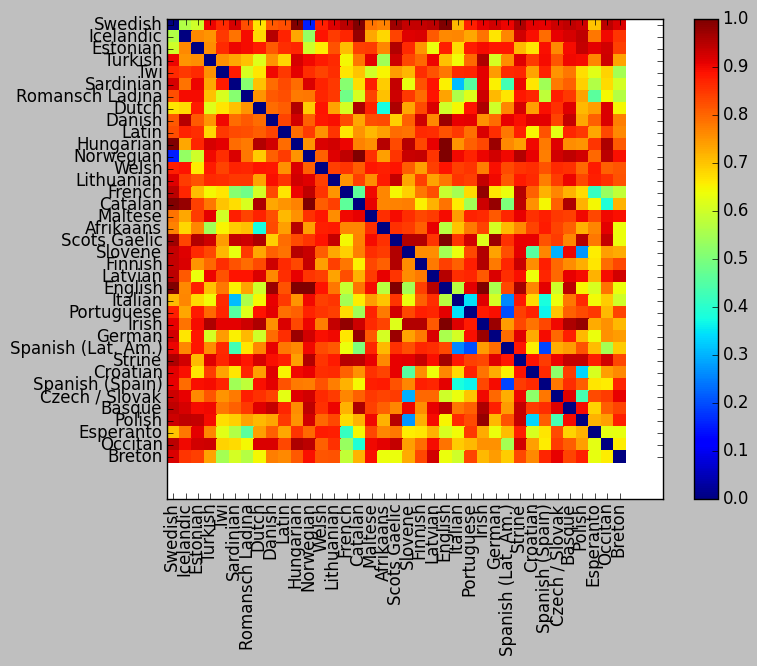

In [54]:
language_to_pron = {e[1]['SampleID']: e[1]['Pronunciation'] for e in df.iterrows()}

all_pron_chars = []
for e in language_to_pron.values():
    all_pron_chars.extend(e)
all_pron_chars = set(all_pron_chars)

pron_substitution_matrix = {}
for c in all_pron_chars:
    row = {}.fromkeys(all_pron_chars, -2.0)
    row[c] = 5.0
    pron_substitution_matrix[c] = row

languages = language_to_pron.keys()
distances = np.zeros((len(languages), len(languages)))
for i, language1 in enumerate(languages):
    language1_phrase = language_to_pron[language1]
    for j in range(i):
        language2 = languages[j]
        language2_phrase = language_to_pron[language2]
        alignment = global_pairwise_align(language1_phrase, language2_phrase,
                                          gap_open_penalty=5, gap_extend_penalty=2,
                                          substitution_matrix=pron_substitution_matrix)
        distances[i, j] = distances[j, i] = alignment.distances()[0,1]

dm = DistanceMatrix(distances, languages)
dm

In [55]:
df.to_csv('map.txt', sep='\t', 
          header=["#SampleID", "Spelling", "Pronunciation", "GeogrpahicLocation", "Type"],
          na_rep="No data", index=False)
dm.write('language-dm.txt')

!principal_coordinates.py -i language-dm.txt -o language-pc.txt
!make_emperor.py -o language-plots -i language-pc.txt -m map.txt

FileLink('language-plots/index.html')

/Users/caporaso/.virtualenvs/qiime/lib/python2.7/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:107: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.34878960393 and the largest is 1.76919554975.
  RuntimeWarning


/Users/caporaso/Dropbox/code/sketchbook/2015.4.20-emperor-languages-example/language-plots/index.html